<a href="https://colab.research.google.com/github/m-bkarimi/Grokking-Deep-Learning/blob/master/chapter6_gdl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

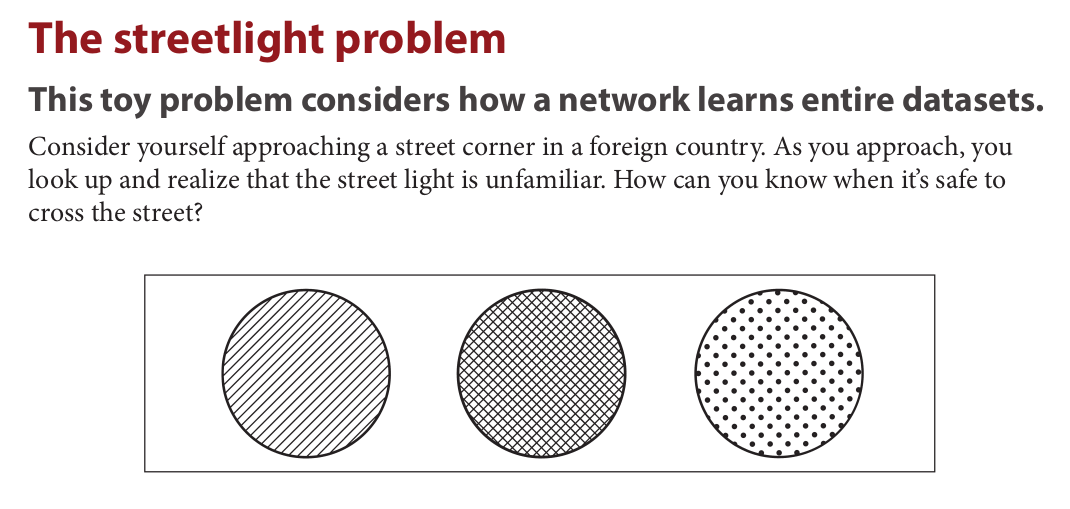

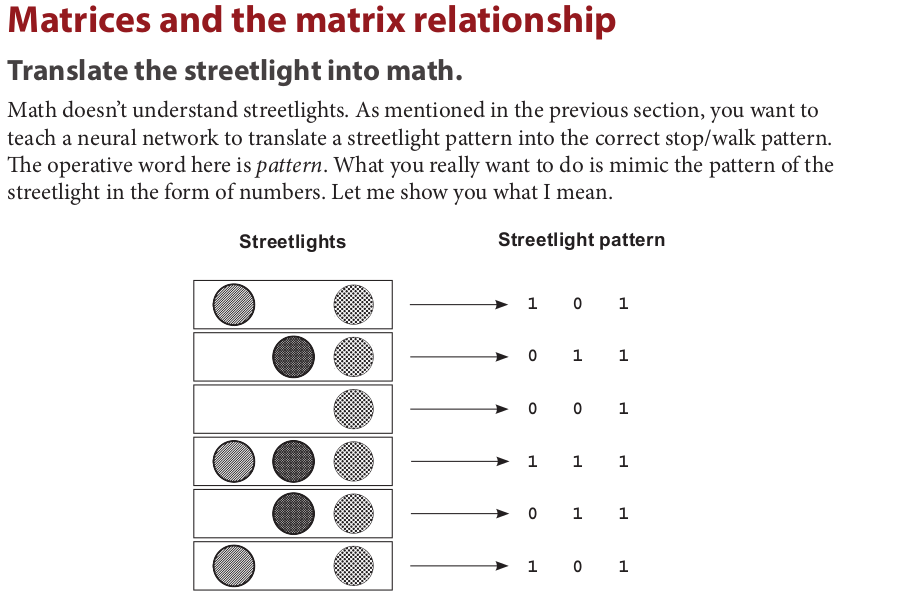

<font color=red>**Building a neural network**</font>


In [ ]:
import numpy as np
weights = np.array([0.5,0.48,-0.7])
alpha = 0.1
streetlights = np.array([[1,0,1],
                        [0,1,1],
                        [0,0,1],
                        [1,1,1],
                        [0,1,1],
                        [1,0,1]])
walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )
input = streetlights[0]
print(input)
goal_prediction = walk_vs_stop[0]
# [1,0,1]
# Equals 0 (stop)
for iteration in range(20):
  prediction = input.dot(weights)
  error = (goal_prediction - prediction) ** 2
  delta = prediction - goal_prediction
  weights = weights - (alpha * (input * delta))
  print("Error:" + str(error) + " Prediction:" + str(prediction))

<font color=red>**Learning the whole dataset**</font>

**The neural network has been learning only one streetlight. Don’t
we want it to learn them all?**


In [ ]:
import numpy as np
weights = np.array([0.5,0.48,-0.7])
alpha = 0.1
streetlights = np.array([[1,0,1],
                        [0,1,1],
                        [0,0,1],
                        [1,1,1],
                        [0,1,1],
                        [1,0,1]])
walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )
input = streetlights[0]
print(input)
goal_prediction = walk_vs_stop[0]
# [1,0,1]
# Equals 0 (stop)
for iteration in range(40):
  error_for_all_lights = 0
  for row_index in range(len(walk_vs_stop)):
    input = streetlights[row_index]
    goal_prediction = walk_vs_stop[row_index]
    prediction = input.dot(weights)
    error = (goal_prediction - prediction) ** 2
    error_for_all_lights += error
    delta = prediction - goal_prediction
    weights = weights - (alpha * (input * delta))
    print("Prediction:" + str(prediction))
    print("Error:" + str(error_for_all_lights) + "\n")


<font color=red>**Full, batch, and stochastic gradient descent**</font>

**Stochastic gradient descent updates weights one example
at a time.**

**(Full) gradient descent updates weights one dataset at a time.**
**Batch gradient descent updates weights after n examples.**

<font color=red>**Neural networks learn correlation**</font>

**What did the last neural network learn?**

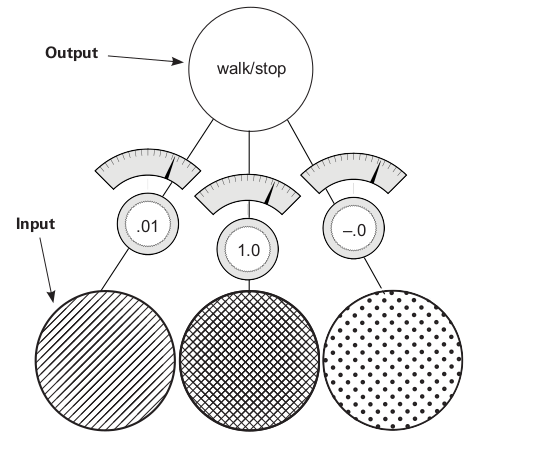

Notice that the middle weight is very near 1, whereas the far-left and far-right weights are
very near 0. At a high level, all the iterative, complex processes for learning accomplished
something rather simple: the network identified correlation between the middle input and
output. The correlation is located wherever the weights were set to high numbers. Inversely,
randomness with respect to the output was found at the far-left and far-right weights (where
the weight values are very near 0).
How did the network identify correlation? Well, in the process of gradient descent, each
training example asserts either up pressure or down pressure on the weights.


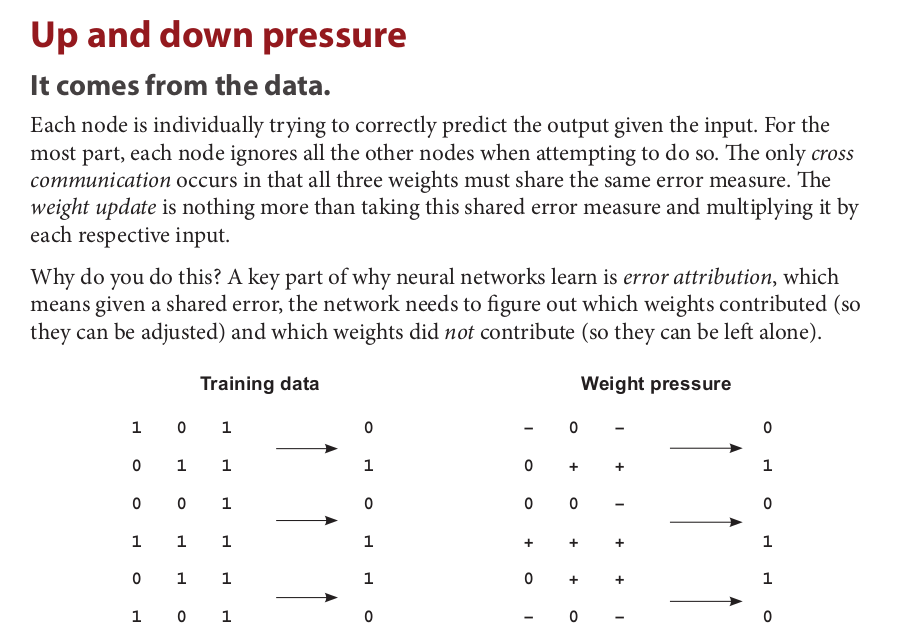

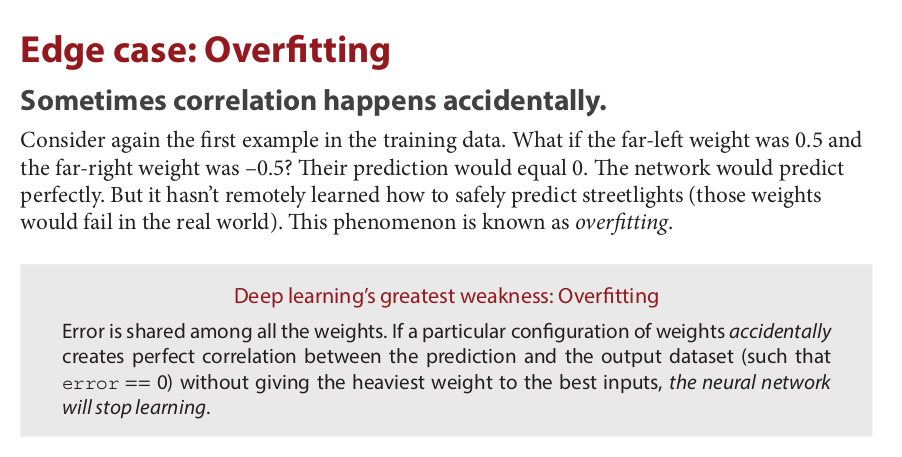

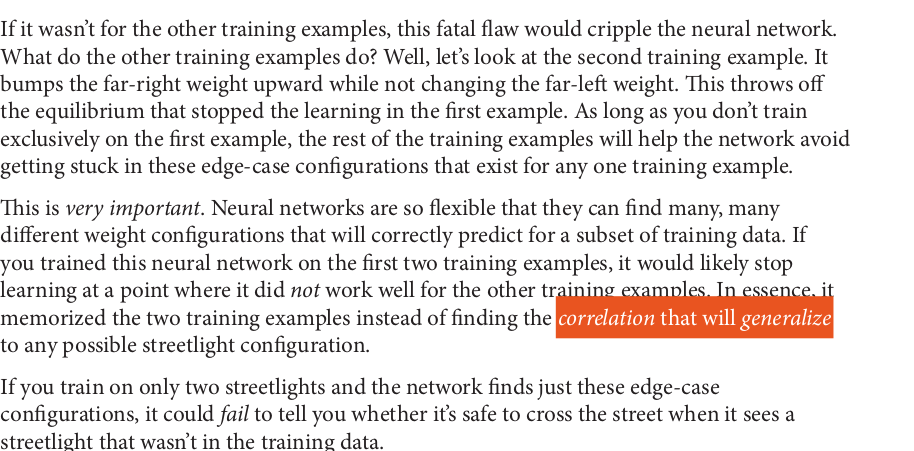

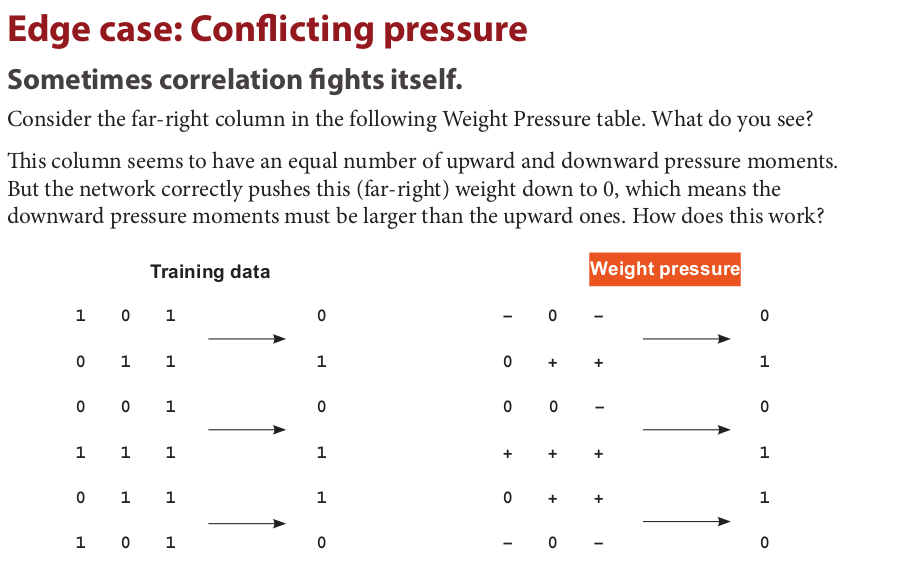

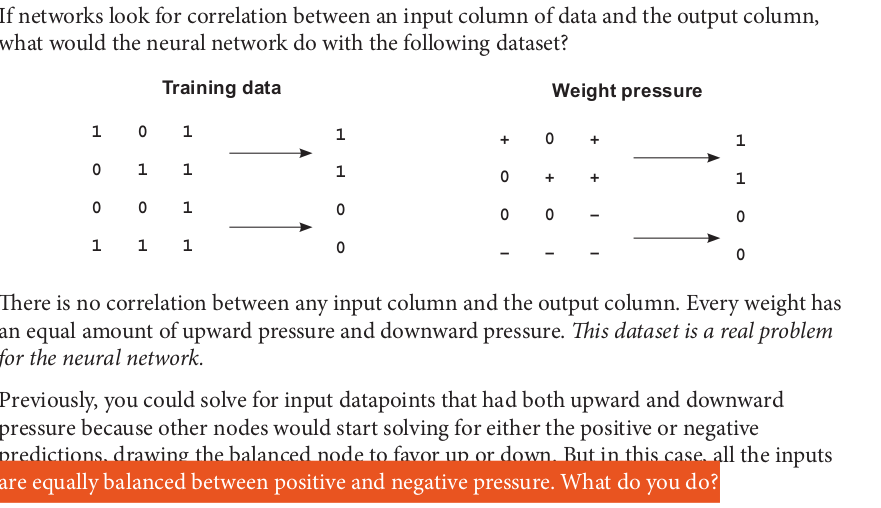

<font color=red>**Learning indirect correlation**</font>

**If your data doesn’t have correlation, create intermediate data
that does!**

Because the input dataset doesn’t correlate with the output dataset, you’ll use the input
dataset to create an intermediate dataset that does have correlation with the output. It’s kind
of like cheating.

<font color=red>**Creating correlation**</font>
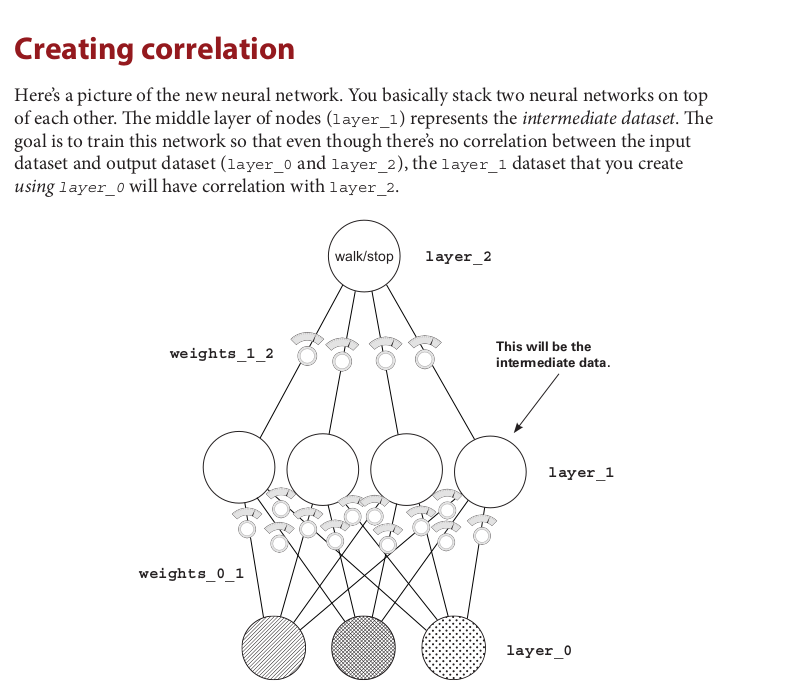

<font color=red>**Linear vs. nonlinear**</font>
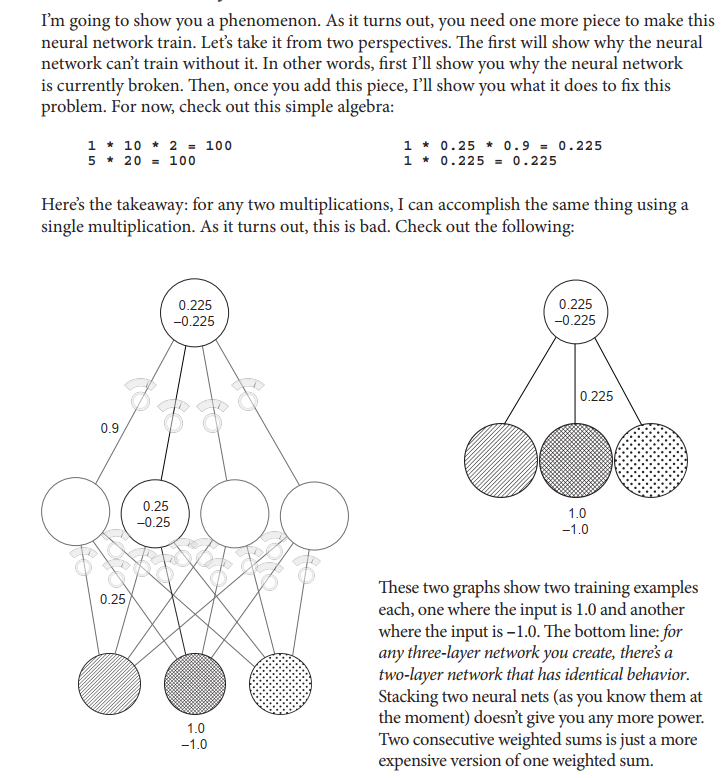




In mathematics, a function is considered linear if it follows the principle of superposition, meaning that the output is directly proportional to the input. This means that if you double the input, the output will also double, and if you add two inputs together, the output will be the sum of their individual outputs.

However, not all functions follow this linear pattern. Some functions have nonlinearities, which means that the output is not directly proportional to the input. Instead, the relationship between the input and output is more complex.

<font color=blue>**Problem: For any two consecutive weighted sums of the input, there exists a single
weighted sum with exactly identical behavior. Anything that the three-layer network can
do, the two-layer network can also do.**</font>

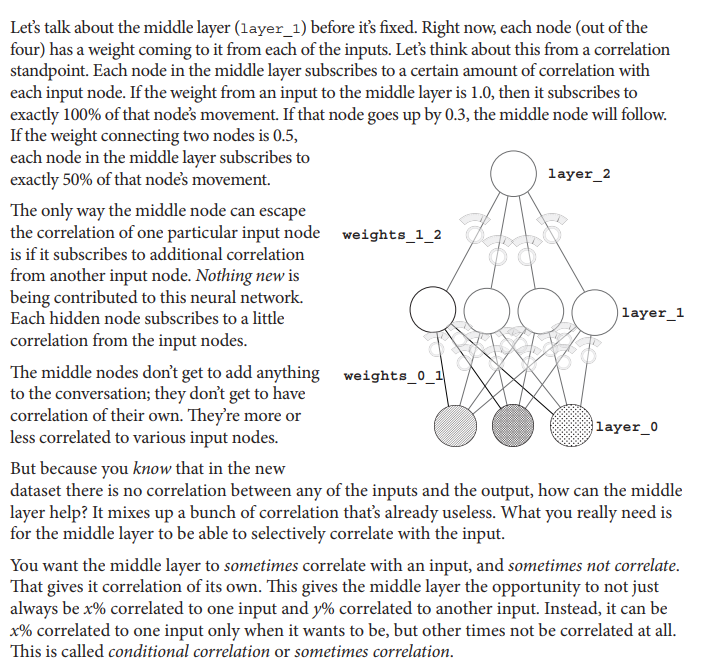


In [ ]:
import numpy as np

np.random.seed(1)

def relu(x):
    return (x > 0) * x # returns x if x > 0
                       # return 0 otherwise

def relu2deriv(output):
    return output>0 # returns 1 for input > 0
                    # return 0 otherwise
streetlights = np.array([[1,0,1],
                        [0,1,1],
                        [0,0,1],
                        [1,1,1],
                        [0,1,1],
                        [1,0,1]])
walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )

alpha = 0.2
hidden_size = 4
weights_0_1 = 2*np.random.random((3,hidden_size)) - 1
print(weights_0_1)
weights_1_2 = 2*np.random.random((hidden_size,1)) - 1

for iteration in range(60):
   layer_2_error = 0
   for i in range(len(streetlights)):
      layer_0 = streetlights[i:i+1]
      print('layer0', streetlights[i:i+1]
)
      layer_1 = relu(np.dot(layer_0,weights_0_1))
      layer_2 = np.dot(layer_1,weights_1_2)

      layer_2_error += np.sum((layer_2 - walk_vs_stop[i:i+1]) ** 2)

      layer_2_delta = (walk_vs_stop[i:i+1] - layer_2)
      layer_1_delta=layer_2_delta.dot(weights_1_2.T)*relu2deriv(layer_1)

      weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
      weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

   if(iteration % 10 == 9):
      print("Error:" + str(layer_2_error))


[[-0.16595599  0.44064899 -0.99977125 -0.39533485]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.20646505  0.07763347 -0.16161097  0.370439  ]]
layer0 [[1 0 1]]
layer0 [[0 1 1]]
layer0 [[0 0 1]]
layer0 [[1 1 1]]
layer0 [[0 1 1]]
layer0 [[1 0 1]]
layer0 [[1 0 1]]
layer0 [[0 1 1]]
layer0 [[0 0 1]]
layer0 [[1 1 1]]
layer0 [[0 1 1]]
layer0 [[1 0 1]]
layer0 [[1 0 1]]
layer0 [[0 1 1]]
layer0 [[0 0 1]]
layer0 [[1 1 1]]
layer0 [[0 1 1]]
layer0 [[1 0 1]]
layer0 [[1 0 1]]
layer0 [[0 1 1]]
layer0 [[0 0 1]]
layer0 [[1 1 1]]
layer0 [[0 1 1]]
layer0 [[1 0 1]]
layer0 [[1 0 1]]
layer0 [[0 1 1]]
layer0 [[0 0 1]]
layer0 [[1 1 1]]
layer0 [[0 1 1]]
layer0 [[1 0 1]]
layer0 [[1 0 1]]
layer0 [[0 1 1]]
layer0 [[0 0 1]]
layer0 [[1 1 1]]
layer0 [[0 1 1]]
layer0 [[1 0 1]]
layer0 [[1 0 1]]
layer0 [[0 1 1]]
layer0 [[0 0 1]]
layer0 [[1 1 1]]
layer0 [[0 1 1]]
layer0 [[1 0 1]]
layer0 [[1 0 1]]
layer0 [[0 1 1]]
layer0 [[0 0 1]]
layer0 [[1 1 1]]
layer0 [[0 1 1]]
layer0 [[1 0 1]]
layer0 [[1 0 1]]
layer0 [[0 1 